# 2b) Z-Dönüşümü ve Sistemler

<a href="https://colab.research.google.com/drive/1Lec5nOh0lzvE231rcSUto4ucRpnm02fm?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Z-Dönüşümü ve Sistemler

**Önemli not:** Bu defterin içeriği mühendislik öğrencileri/mezunlarına yönelik hazırlanmıştır. Bu alanda deneyiminiz yok ise içerik sizin için yorucu olabilir. Bu durumda bu defteri atlayıp "Sinyallerin frekans spektrum analizi" başlıklı 4. defterden okumaya devam edebilirsiniz. 

Bu defterimizde sistemlerin özelliklerini incelerken kullanacağımız z-dönüşümünü ele alacağız. Kuramsal detaylar başka birçok kaynakta ele alındığı için pratiğe odaklanacağız.  

Kuramsal bilgiler için şu kaynaklara başvurabilirsiniz:

Lecture Notes by J. Fessler "Digital Signal Processing and Analysis":
*   [The z-transform and Analysis of LTI Systems](https://web.eecs.umich.edu/~fessler/course/451/l/pdf/c3.pdf) 
*   [Frequency analysis of signals and systems](https://web.eecs.umich.edu/~fessler/course/451/l/pdf/c4.pdf)



Defterimize gerekli kütüphaneleri yükleyerek başlayalım

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
import IPython
import warnings
warnings.filterwarnings('ignore')

Bir önceki defterimizde sayısal sistemlerimizi tanımlamak için şu genel ifadenin kullanılabileceğini görmüştük:

$$
y[n] = \sum_{k = 0}^{N} b[k]x[n-k] - \sum_{k = 1}^{M} a[k]y[n-k]
$$

ve Fourier dönüşümü uygulayarak denklemi önce alttaki forma dönüştürmüş;

$$
Y(e^{jw}) = \sum_{k = 0}^{N} b[k]e^{-jkw}X(e^{jw}) - \sum_{k = 1}^{M} a[k]e^{-jkw}Y(e^{jw})
$$

daha sonra da girdi-çıktı oranından sistemin frekans cevabını şu şekilde yazmıştık;

$$
H(e^{jw}) = \frac{Y(e^{jw})}{X(e^{jw})}=\frac{\sum_{k = 0}^{N} b[k]e^{-jkw}}{(1+\sum_{k = 1}^{M} a[k]e^{-jkw})} 
$$


Fourier dönüşümü sadece kararlı sistemlerin frekans cevabını elde etmek için kullanılabilir ([bakınız](https://ccrma.stanford.edu/~jos/st/Existence_Fourier_Transform.html)). Kararlı veya kararsız, tüm sistemler için uygulayabileceğimiz bir dönüşüm kullanabilmek faydalı olacaktır.

İlk defterimizde $z = e^{j\omega}$ değişken dönüşümü ile Fourier dönüşümünün daha genel bir formu sayılabilecek *z-Dönüşümü*'nü sınırlı uzunluktaki sayısal sinyaller için elde etmiştik. Elimizde dönüşüm sonucu elde ettiğimiz ifadelerin aslında polinomlar olduğunu, polinom katsayılarının da doğrudan sinyalin örneklerinden geldiğini göstermiştik. 

Burada da benzer dönüşümü yapmanın çeşitli açılardan fayda sağlayacağını göreceğiz:

*    Kararlı olmayan sistemler için de dönüşüm yapabilecek ve sistem karakteristiğini inceleyebileceğiz. 
*   Polinomların kökleri ile sistem frekans cevabı arasındaki ilginç ilişkileri inceleyebileceğiz


Aynı işlemi burada tekrarlayarak sistemin frekans cevabı için z-Dönüşümü ifadesini elde edelim. 

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k = 0}^{N} b[k]z^{-k}}{(1+\sum_{k = 1}^{M} a[k]z^{-k})}
$$

Bununla $H(z)$'yi biri $N$ derecesinde diğeri $M$ derecesinde bir polinomun oranı şeklinde ifade etmiş olduk. Polinom terimlerini açık da yazabilirdik:

$H(z) = \dfrac {b_0 + b_1z^{-1} + b_2z^{-2} + \ldots + b_Nz^{-N}}{a_0 + a_1z^{-1} + a_2z^{-2} + \ldots + a_Mz^{-M}}$



### Kutuplar ve sıfırlar

$Q$ dereceli bir polinomu $Q$ adet tek dereceli polinom çarpımı şeklinde yazabiliriz. Polinomlarımızı bu şekilde de yazalım:

$H(z) = k\dfrac {(1-q_1z^{-1})(1-q_2z^{-1})\ldots (1-q_ Nz^{-1})}{(1-p_1z^{-1})(1-p_2z^{-1})\ldots (1-p_Mz^{-1})}$

Bu işlemle polinomlarımızı çarpanlarına ayırmış olduk. Bu ifadede, $q_n$ değerleri üstteki polinomun değerini sıfır ve dolayısıyla $H(z)$'yi sıfır yapan değerler olduğu için **sıfırlar (İng: zeros)** olarak adlandırılır. Benzer şekilde $p_m$ değerleri de alttaki polinomun değerini sıfır ve dolayısıyla $H(z)$'yi sonsuz yapan değerler olduğu için önemlidirler ve **kutuplar (İng: poles)** olarak adlandırılırlar.

Bu ifadelerde kullandığımız $z$ bağımsız değişkeni kompleks bir değerdir. Sistemlerin frekans karakteristiğini incelerken kompleks z uzayında kutupları ve sıfırları görselleştirmek yaygın kullanılan bir uygulamadır. z-dönüşümü ile Fourier dönüşümü arasındaki ilişikiyi $z = e^{j\omega}$ değişken dönüşümü üzerinden kurmuştuk.  $e^{j\omega}$ değerlerinin tümü birim çember üzerinde olduğu için çizimlerimize birim çemberi de ekleyeceğiz. 

İlk olarak $H(z)$ ifadesinin bağımsız değişkeni olan $z$'nin sıfırlar ve kutuplar gibi sistem açısından kritik değerlerini görselleştirmek için bir fonksiyon tanımlayalım:

In [ ]:
# Kutuplar ve sıfırları z-uzayında görselleştirme fonksiyonu
def z_uzayi_cizdir(kutuplar, sifirlar):
  plt.figure(figsize=(4, 4))
  # Birim çember çizimi
  t = np.linspace(0,2*np.pi, 100)
  plt.plot(np.cos(t), np.sin(t), 'k')

  # Eksen doğrularının çizimi
  plt.plot([0,0], [-1,1], 'k', linewidth=0.5)
  plt.plot([-1,1], [0,0], 'k', linewidth=0.5)

  # Sıfır ve kutupların çizimi
  for kutup in kutuplar:
    plt.plot(kutup.real, kutup.imag, 'x', markersize=10, color='red')
  for sifir in sifirlar:
    plt.plot(sifir.real, sifir.imag, 'o', markersize=10, color='red')

  plt.text(-0.95, 0.95, 'z uzayı', fontsize=14)
  plt.text(-0.8, -0.07, 'gerçel', fontsize=13)
  plt.text(-0.15, 1.03, 'sanal', fontsize=13)
  plt.grid();

**Örnek sistem-1)** Bir örnek sistem için kutup ve sıfırları görselleştirelim. Örneğin şu denklemle tanımlı sistemi ele alalım:

$y[n]-0.9y[n-1] = x[n]+0.5x[n-1]$

Fark denkleminden yola çıkarak (bu denklemin terimlerine $z$-dönüşümü uygulayarak) $H(z)$'yi yazabiliriz:  
$$
H(z) = \frac{1+0.5z^{-1}}{1-0.9z^{-1}}
$$

Sistemimizin bir adet sıfırı var: $q_1 = -0.5$ ve bir adet kutubu var: $p_1 = 0.9$. Bu değerleri $z$-uzayında görselleştirelim.

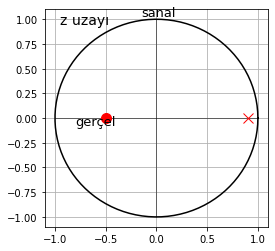

In [ ]:
sifirlar = [-0.5]; kutuplar = [0.9]
z_uzayi_cizdir(kutuplar, sifirlar)

Şekil 3.1: $H(z) = \frac{1+0.5z^{-1}}{1-0.9z^{-1}}$ sisteminin sıfır ve kutuplarının $z$-uzayında gösterimi

Bir önceki defterimizde sistemin frekans cevabını çizdirmek için bir fonksiyon tanımlayıp kullanmıştık. O fonksiyonu buraya kopyalayalım ve elimizdeki sistemin parametreleriyle (polinom katsayıları ile) çağırıp sistemin frekans cevabını çizdirelim. Hatırlayalım: üstteki polinomun katsayılarını $b$ vektörü/dizisi, alttaki polinomun katsayılarını $a$ vektörü/dizisi içerisine yazıp çizim oluşturmak için kullanıyorduk. Aynı zamanda sistemin girdi sinyaline verdiği çıktıyı hesaplamak için bu iki diziyi ($b$ ve $a$) kullanabiliyorduk. 

In [ ]:
# scipy.signal.freqz kullanarak frekans cevabı çizdirme fonksiyonu
def frekans_cevabi_cizdir(b, a):
  # a ve b polinomları verilen bir sistemin frekans cevabının hesaplanması
  w, h = signal.freqz(b, a) # w frekans değerlerini, h ise H(e^jw) degerlerini içeriyor
  # frekans eksenini normalize edelim, bu karşılaştırmalarımızı kolaylaştıracak
  w /= np.pi 

  fig, ax1 = plt.subplots()
  ax1.set_title('Filtre frekans cevabı')
  ax1.plot(w, 20*np.log10(abs(h)), 'b')
  ax1.set_ylabel('Genlik [dB]', color='b')
  ax1.set_xlabel('Normalize frekans [$\pi$ radyan/örnek]')
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Açı (radyan)', color='g')
  ax2.grid()
  ax2.axis('tight')
  plt.show()

Polinom katsayılarını içeren dizilerimizi yazıp frekans cevabını çizdirelim

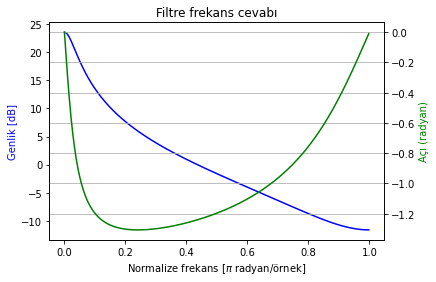

In [ ]:
h_b = [1, 0.5]
h_a = [1, -0.9]
frekans_cevabi_cizdir(h_b, h_a)

Şekil 3.2: $H(z) = \frac{1+0.5z^{-1}}{1-0.9z^{-1}}$ sisteminin frekans cevabı

Sistemin bir düşük geçiren filtre karekteristiği olduğunu görüyoruz. 
Yukarıda iki grafiği (Şekil 3.1 ve 3.2) beraber değerlendirmek ve ilişkilendirmek için kullandığımız değişken dönüşümünü ($z= e^{jw}$) dikkate almalıyız: Şekil 3.2'deki spektrum çizimimizde x ekseni açısal frekans değerlerini içeriyor ve 0-$\pi$ aralığında (daha doğrusu $\pi$ ile normalize edilerek 0-1 aralığında) çizilmiş. Şekilde 3.1'de ($z= e^{jw}$) değerlerini $w$'nın 0-$2\pi$ aralığındaki değerleriyle çizdirirsek birim çemberi elde ederiz. Frekans cevabı (Fourier dönüşümü) hesabı, $z$'nin birim çember üzerinde aldığı değerler $H(z)$ ifadesine yerleştirilerek elde ediliyor. İki şekil arasındaki temel ilişki bu bağlamda kuruluyor: $z$-uzayındaki birim çember üzerindeki noktaların ($e^{jw}$) açıları, Şekil 3.2'deki x eksenindeki açı olan $w$'ya denk geliyor.

Hedefimiz $z$-uzayındaki sıfır ve kutuplar ile frekans cevabı arasında bir ilişki kurmak. Bu örneğimizde $w=0$'da (kutbun bulunduğu açıda) spektrumda bir tepe, $w=\pi$'de (sıfırın bulunduğu açıda) spektrumda bir çukur mevcut. Biraz daha karmaşık (derecesi büyük) sistemleri ele almak için polinom katsayıları ve kökleri arasındaki dönüşümleri Python kodlama ile yapabilmeye ihtiyacımız var. Önce kısaca bu konuyu ele alalım, sonra daha karmaşık sistemleri inceleyelim. 

#### Python ile polinom katsayıları ve kökleri arasında dönüşüm işlemleri

Bir polinomun katsayıları bilindiğinde kökleri, kökleri bilindiğinde ise polinom katsayıları bulunabilir. Bu kestirimleri Python numpyb kütüphanesi [polyfromroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html) ve [np.roots](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) fonksiyonları ile yapabiliriz. Yukarıda örnekte ele aldığımız sistemin kökleri ve katsayılarını kullanalım. 

In [ ]:
# Kökleri verilen bir polinomun katsayılarının bulunması
import numpy.polynomial.polynomial as poly

# Sıfırlardan b polinom katsayılarının hesaplanması
b = poly.polyfromroots(sifirlar)
print('Kökleri', sifirlar, 'olan bir polinomun polyfromroots ile hesaplanan katsayıları; b =', b)

# Kutuplardan a polinom katsayılarının hesaplanması
a = poly.polyfromroots(kutuplar)
print('Kökleri', kutuplar, 'olan bir polinomun polyfromroots ile hesaplanan katsayıları; a =', a)

print('Frekans cevabını çizdirirken kullandığımız polinom katsayıları: b =', h_b, 'a =', h_a)

Kökleri [-0.5] olan bir polinomun polyfromroots ile hesaplanan katsayıları; b = [0.5 1. ]
Kökleri [0.9] olan bir polinomun polyfromroots ile hesaplanan katsayıları; a = [-0.9  1. ]
Frekans cevabını çizdirirken kullandığımız polinom katsayıları: b = [1, 0.5] a = [1, -0.9]


polyfromroots fonksiyonu yazılırken polinom katsayıları sıralaması en büyükten küçüğe sıralandığı için bizim $H(z)$ üzerinden yazdığımız polinom katsayıları ile ters sıralama elde ettik ancak değerler aynı. Bir de polinom katsayılarından kökleri elde etmeyi deneyelim. Bunun için [numpy-roots](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) fonksiyonunu kullanacağız.

In [ ]:
# Katsayıları verilen bir polinomun köklerinin bulunması
print('Katsayıları', h_b, 'olan bir polinomun np.roots ile hesaplanan kokleri; sıfırlar =', np.roots(h_b))
print('Katsayıları', h_a, 'olan bir polinomun np.roots ile hesaplanan kokleri; kutuplar =', np.roots(h_a))
print('Denklemlerden çıkartıp kullandığımız sıfırlar =', sifirlar, 'kutuplar =', kutuplar)

Katsayıları [1, 0.5] olan bir polinomun np.roots ile hesaplanan kokleri; sıfırlar = [-0.5]
Katsayıları [1, -0.9] olan bir polinomun np.roots ile hesaplanan kokleri; kutuplar = [0.9]
Denklemlerden çıkartıp kullandığımız sıfırlar = [-0.5] kutuplar = [0.9]


Katsayıları verdiğimizde kökleri elde edebildik ve bu işlemde bir sıralama sorunu yaşamadık. Demek ki yapmamız gereken poly.polyfromroots fonksiyonunun sonucu olan katsayılar dizisini tersine çevirerek kullanmak. Kökler açısından bir sıralama sorunumuz yok, çünkü polinomların köklerini sıralı tutmamıza gerek yok. Ancak polinom katsayılarının sırası önemli (sistem cevabının faz spektrumuna etkisi var). Son olarak doğrulama amaçlı, kök bulma ile polinom katsayı bulma işlemlerini ardışık kullanıp birbirinin tersi olup olmadığını kontrol edelim: 

In [ ]:
# Sonucunu bilip kontrol edebileceğimiz rasgele bir polinom ile kontrolümüzü gerçekleştirelim
# (x+3)(x-2) polinomunun önce köklerden katsayılarını ve daha sonra katsayılardan köklerini buldurup karşılaştıralım
kokler = [-3, 2] 
print(f'Tanımlanan kökler = {kokler}, hesaplanan kökler =', np.roots(poly.polyfromroots(kokler)[::-1]))

Tanımlanan kökler = [-3, 2], hesaplanan kökler = [-3.  2.]


Artık gerektiğinde köklerden katsayıları veya katsayılardan kökleri bulabiliriz. Birbirine dönüşüm yaparken tek dikkat etmemiz gereken nokta poly.polyfromroots sonucunda elde edilen dizinin ters çevirilmesi gerektiği. Şimdi artık başka bir örnek sistem ele alabiliriz. 

**Örnek sistem-2)**

Kutupları $0.95 e^{j\pi/4}$ ve $0.95 e^{-j\pi/4}$ olan bir sistemin $z$-uzayındaki temsilini çizdirelim.

$$H(z) = \dfrac {1}{(1-0.95 e^{j\pi/4}z^{-1})(1-0.95 e^{-j\pi/4}z^{-1})}$$

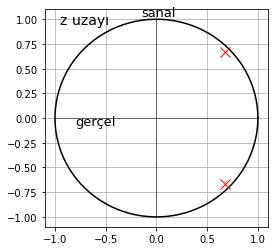

In [ ]:
theta = np.pi/4
r = 0.95
kutuplar = [r*np.exp(1j*theta), r*np.exp(-1j*theta)]
sifirlar = []
z_uzayi_cizdir(kutuplar, sifirlar)

Şekil 3.3: $H(z) = \dfrac {1}{(1-0.95 e^{j\pi/4}z^{-1})(1-0.95 e^{-j\pi/4}z^{-1})}$ sisteminin sıfır ve kutuplarının $z$-uzayında gösterimi

Köklerden polinom katsayılarını bulalım:

In [ ]:
h_b = poly.polyfromroots(sifirlar)[::-1]
h_a = poly.polyfromroots(kutuplar)[::-1]
print('b =', h_b, 'a =', h_a)

b = [1.] a = [ 1.        +0.j -1.34350288+0.j  0.9025    +0.j]


Bulduğumuz polinom katsayılarından sistemi şu şekilde de ifade edebilirdik:

$$H(z) = \dfrac {1}{(1-1.34350288 z^{-1}+0.9025 z^{-2})}$$

LCCDE denklemini yazmak istersek:

$$y[n]-1.34350288y[n-1]+0.9025y[n-2]=x[n]$$

Kutuplar alttaki polinomu tanımlıyor. Alttaki polinom da $y[n]$'nin geçmiş değerlerinin çıktıya($y[n]$) katkısını tanımlıyor. Denklemin bu kısmına, $y[n]$nin kendi geçmiş değerlerinden oluşturulmasıyla ilgili olduğu için kendini oluşturan manasında "özbağlanımlı"(İng: auto-regressive: AR) adı veriliyor. Denklemin özbağlanımlı kısmı kutuplarla doğrudan ilişkili. $H(z)$ için yazdığımız genel ifadede üstteki polinomu ele aldığımızda ise çıktının($y[n]$), girdi ($x[n]$) ve geçmiş değerlerinin ağırlıklı ortalaması ile ilişkisini görüyoruz (bu örnekte sadece $1*x[n]$). Bu kısma "hareketli ortalama" (İng: moving average: MA) adı veriliyor. Bu isimlendirmeden yola çıkarak birçok sistem AR, MA ve iki bileşeni de içeren ARMA kategorileri kapsamında ele alınır.




### AR, ARMA ve MA sistemler

*   AR: $y[n]$ kendi geçmiş değerlerinden ve $x[n]$'in n'deki değerinden oluşturuluyor: özbağlanımlı sistem, $y[n]$'nin geçmiş değerlerini ağırlıklandıran katsayılar alttaki polinomu ve dolayısıyla kutupları tanımlıyor. Bu tür sistemlere bu sebeple "all-pole" ismi de veriliyor.
$$
y[n] = x[n] - \sum_{k = 1}^{M} a[k]y[n-k]
$$
Örneğin, konuşma sinyalini modellemek için önerilen "all-pole" sistem son 50 yılda çok yaygın bir şekilde kullanılmış ve birçok konuşma sinyal işleme algoritmasının temelini oluşturmuştur. ([J.S. Lim, A. V. Oppenheim, "All-Pole Modeling of Degraded Speech", IEEE Trans. on Acoustics, Speech, and Signal Pro., 1978.](https://www.rle.mit.edu/dspg/documents/allpole_1978.pdf) içerisindeki ilk denklemleri inceleyebilirsiniz.) Birçok konuşma sıkıştırma algoritması da bu model üzerine dayanır. (Şu özet dökümanında 4. bölümü inceleyebilirsiniz: [S.K.Jagtap, M.S. Mulye, M.D.Upane, "Speech coding techniques", ICAC3'15](https://core.ac.uk/download/pdf/82143559.pdf)) Aşağıda kaydedilmiş bir konuşma sinyali üzerinden o sinyali oluşturan AR sisteminin polinom katsayılarını ve polinom köklerini incelediğimiz bir örnek ele alacağız. 
*   MA: $y[n]$, $x[n]$'in o anki ve geçmiş değerlerinden oluşturuluyor, hareketli ortalama sistemi, $x[n]$'nin geçmiş değerlerini ağırlıklandıran katsayılar üstteki polinomu ve dolayısıyla sıfırları tanımlıyor. Bu tür sistemlere bu sebeple "all-zero" ismi de veriliyor. Bu tür sistemlere örnek olarak daha önce ele aldığımız hareketli ortalama sistemini düşünebilirsiniz. 
$$
y[n] = \sum_{k = 0}^{N} b[k]x[n-k]
$$
*   ARMA: $y[n]$, hem $y[n]$'in geçmiş değerlerinden hem de $x[n]$'in o anki ve geçmiş değerlerinden oluşturuluyor
$$
y[n] = \sum_{k = 0}^{N} b[k]x[n-k] - \sum_{k = 1}^{M} a[k]y[n-k]
$$

Yukarıda ele aldığımız sistem (örnek-2) AR türü (all-pole) bir sistem. 
Bu konuyla ilgili daha detaylı bilgi için şu kaynakları inceleyebilirsiniz:
http://kilyos.ee.bilkent.edu.tr/~kozat/papers/chapter2_v1.pdf

Kutupları $0.95 e^{j\pi/4}$ ve $0.95 e^{-j\pi/4}$ olan sistemimizin frekans cevabını yukarıda köklerden elde ettiğimiz katsayıları kullanarak çizdirelim:

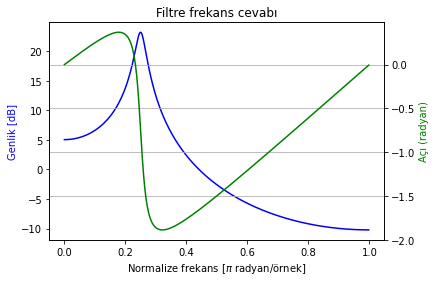

In [ ]:
frekans_cevabi_cizdir(h_b, h_a)

Şekil 3.4: $H(z) = \dfrac {1}{(1-0.95 e^{j\pi/4}z^{-1})(1-0.95 e^{-j\pi/4}z^{-1})}$ sisteminin frekans cevabı

Frekans cevabında $w = \pi/4$'te bir tepe gözledik. Neden bir tepe gözlediğimizi anlamak için şunu yapalım: $w=\pi/4$ olduğu durumdaki $z$ değerini ($z=e^{jw}= e^{j\pi/4}$) denkleme yerleştirip $H(z)$'nin değerini (diğer bir deyişle $H(e^{jw})$'yı, yani Fourier dönüşümünü) hesaplayalım:

$H(z) = \dfrac {1}{(1-0.95 e^{j\pi/4}z^{-1})(1-0.95 e^{-j\pi/4}z^{-1})} = \dfrac {1}{(1-\dfrac{0.95 e^{j\pi/4}}{e^{j\pi/4}})(1-\dfrac{0.95 e^{-j\pi/4}}{e^{j\pi/4}})} = \dfrac {1}{(0.05)(1-0.95j)}$

$|H(z)|_{dB}= 20log_{10}(1/(0.05*|1-0.95i|))= 20log_{10}(1/(0.05))+20log_{10}(1/|1-0.95i|)= 26.02dB − 2.79dB = 23.23 dB$

Bu işlemde sonuca etkisi en büyük çarpan bölümdeki 0.05 değeridir. O polinomun küçük bir değer alması $H(z)$'nin büyük bir değer almasına sebep olmuştur. $z$'nin kutuplara yakın olduğu yerlerde $H(z)$'nin değeri büyük ve sonuç olarak kutubun bulunduğu açıda bir tepe oluyor.

Benzer bir örneği şurada bulabilirsiniz: https://dspfirst.gatech.edu/chapters/08feedbac/demos/z2freq/index.html

$H(z)$'nin, altaki tek dereceli polinomlardan birisinin değerinin çok küçük yapan $w$ değerlerinde değerinin yüksek olmasını bekleyebiliriz. Hatta ilgili kutup birim çembere ne kadar yakın olursa (örneğin 0.95 yerine 0.99 değeri alırsa) sistemin cevabı daha dik bir tepe içerecektir. Kutupların yerini bu şekilde değiştirip deneyelim. 


**Örnek sistem-3)**

$$H(z) = \dfrac {1}{(1-0.99 e^{j\pi/4}z^{-1})(1-0.99 e^{-j\pi/4}z^{-1})}$$

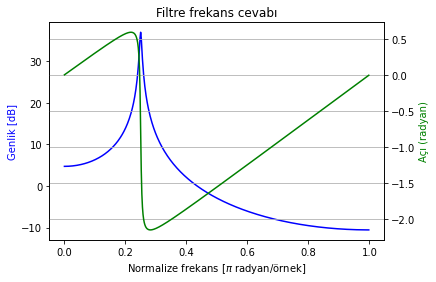

In [ ]:
r = 0.99; theta = np.pi/4
kutuplar = [r*np.exp(1j*theta), r*np.exp(-1j*theta)]
h_a = poly.polyfromroots(kutuplar)[::-1]
frekans_cevabi_cizdir(h_b, h_a)

Şekil 3.5: $H(z) = \dfrac {1}{(1-0.99 e^{j\pi/4}z^{-1})(1-0.99 e^{-j\pi/4}z^{-1})}$ sisteminin frekans cevabı

Genlik spektrumunda gözlenen tepenin daha dikleştiğini görebiliyoruz. Demek ki kutbun birim çembere yakınlığı tepenin daha dikleşmesine yol açıyor ve açısı da tepenin frekans eksenindeki yerini belirliyor. Bu iki bileşenin genlik spektrumuna etkisini gözlemlemek için bir fonksiyon kullanalım. Kodu çalıştırdıktan sonra alttaki kontrol butonlarıyla **$r$** ve **$theta$** değerlerini değiştirin ve spektruma etkiyi gözleyin. 

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider

# r ve theta kontrollü frekans cevabı çizimi

def z_uzayi_ve_frekans_cevabi_cizim(kutuplar, sifirlar):
  # Köklerden polinom katsayıları hesabı
  b = np.polynomial.polynomial.polyfromroots(sifirlar)[::-1]
  a = np.polynomial.polynomial.polyfromroots(kutuplar)[::-1]

  # Frekans cveabının hesaplanması
  w, h = signal.freqz(b, a)
  w /= np.pi
  amp_dB = 20 * np.log10(abs(h))
  angles = np.unwrap(np.angle(h))

  plt.figure(figsize=(18, 4));
  # z-uzayı çizimi
  plt.subplot(1,4,1);
  # Birim çember çizimi
  t = np.linspace(0,2*np.pi, 100);plt.plot(np.cos(t), np.sin(t),'k')
  # Eksenlerin çizimi
  plt.plot([0,0],[-1,1],'k',linewidth=0.5)
  plt.plot([-1,1],[0,0],'k',linewidth=0.5)

  for kutup in kutuplar:
    plt.plot(kutup.real, kutup.imag, 'x', markersize=10, color='red')
  for sifir in sifirlar:
    plt.plot(sifir.real, sifir.imag, 'o', markersize=10, color='red')

  plt.text(-0.95, 0.95, 'z uzayı', fontsize=14);
  plt.text(-0.8, -0.07, 'gerçel', fontsize=13);
  plt.text(-0.15, 1.03, 'sanal', fontsize=13);
  plt.grid();

  # Genlik spektrumu çizimi
  plt.subplot(1, 4, 2);
  plt.plot(w, amp_dB, 'b');
  plt.ylim([np.min(amp_dB) - 20, np.max(amp_dB) + 20]);
  #plt.ylim([-15, 40]);
  plt.title('Genlik spektrumu', color='b');
  plt.xlabel('Frekans [$\pi$ radyan/örnek]');
  plt.ylabel('Genlik [dB]', color='b');
  # Faz spektrumu çizimi
  plt.subplot(1, 4, 3);
  plt.plot(w, angles, 'g');
  plt.title('Faz spektrumu', color='g');
  plt.xlabel('Frekans [$\pi$ radyan/örnek]');
  plt.ylabel('Açı (radyan)', color='g');

  # Faz spektrumu çizimi
  plt.subplot(1, 4, 4);
  plt.plot(w[:-1], -np.diff(angles), 'g');
  plt.title('Grup gecikmesi (fazın türevi)', color='g');
  plt.xlabel('Frekans [$\pi$ radyan/örnek]');
  plt.ylabel('Gecikme', color='g');

# r ve theta kontrollü kutup çifti oluşturma
def kutup_ciftli_sistem_frekans_cevabi(r = FloatSlider(min=0.7, max=0.99, value=0.85, step=0.01), 
              theta = FloatSlider(min=0, max=np.pi, value=np.pi/8, step=0.1)):
  
  kutuplar =  [r*np.exp(1j*theta), r*np.exp(-1j*theta)]
  sifirlar = []
  z_uzayi_ve_frekans_cevabi_cizim(kutuplar, sifirlar)
  

#Calling the function with interaction
interact(kutup_ciftli_sistem_frekans_cevabi);


interactive(children=(FloatSlider(value=0.85, description='r', max=0.99, min=0.7, step=0.01), FloatSlider(valu…

Şekil 3.6: Tek kutup çiftli bir sistem için kullanıcı $r$ ve $\theta$ kontrollü frekans cevabı çizimi. *(Bu figür etkilişimlidir. Html sürümünde etkileşim çalışmayabilir. Etkilişimi kullanabilmek için Jupyter defterini çalıştırmanız gerekebilir.)*

Burada, faz spektrumunun $w$'ya türevi olan [grup gecikmesi](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay)ni (İng: group delay) de çizdirmeyi tercih ettik. Grup gecikmesi, faz spektrumunun işlenmesindeki zorluklardan dolayı nadir kullanılsa da bazı durumlarda kutuplardan kaynaklı tepelerin bulunması için tercih edilebiliyor. Grup gecikmesindeki tepenin daha dik olduğunu görebilirsiniz. 

Şimdi birden fazla kutup çifti içeren sistem örnekleri ele alalım.



**Örnek sistem-4)**


Kutuplar; $p$ = {$0.9e^{j\pi/4}, 0.9e^{-j\pi/4}$, $0.95e^{j\pi/2}$, $0.95e^{j-\pi/2}$}

Kutupları kompleks konjüge/eşlenik seçtik. Bu şekilde seçmez isek oluşan polinomun katsayıları kompleks çıkacaktır ve gerçel değerler içeren girdi sinyaline karşılık sistem kompleks değerler içeren çıktı verecektir. Bundan kaçınıyoruz. 

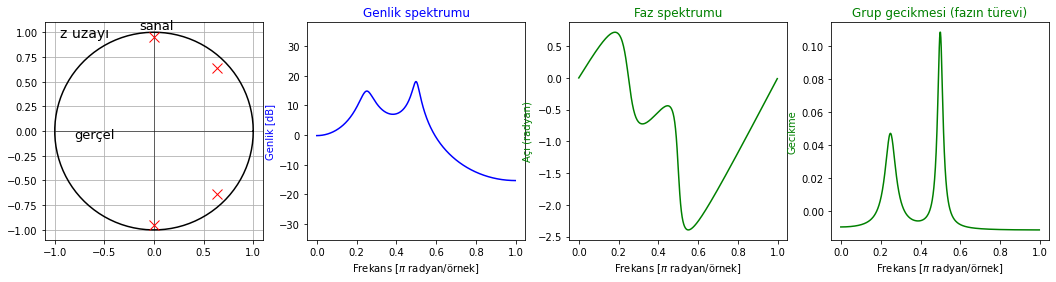

In [ ]:
theta_1 = np.pi/4
r_1 = 0.9
theta_2 = np.pi/2
r_2 = 0.95
kutuplar = [r_1*np.exp(1j*theta_1), r_1*np.exp(-1j*theta_1),
         r_2*np.exp(1j*theta_2), r_2*np.exp(-1j*theta_2)]
sifirlar = []
z_uzayi_ve_frekans_cevabi_cizim(kutuplar, sifirlar)

Şekil 3.7: İki kutup çiftli bir sistem örneği

Her bir kutup çifti için bir tepe gözlüyoruz ve birim çembere daha yakın olan kutup çiftinin oluşturduğu tepe daha dik. 

Bir de hem kutup hem sıfır çiftleri içeren sistemlere örnek görelim.


**Örnek sistem-5)**


Kutuplar; $p$ = {0.8, $0.95e^{j3\pi/8}$, $0.95e^{-j3\pi/8}$, $0.95e^{j3\pi/4}$, $0.95e^{-j3\pi/4}$}

Sıfırlar; $q$ = {$0.95e^{j\pi/8}$, $0.95e^{-j\pi/8}$, $0.95e^{j\pi/2}$, $0.95e^{j-\pi/2}$}

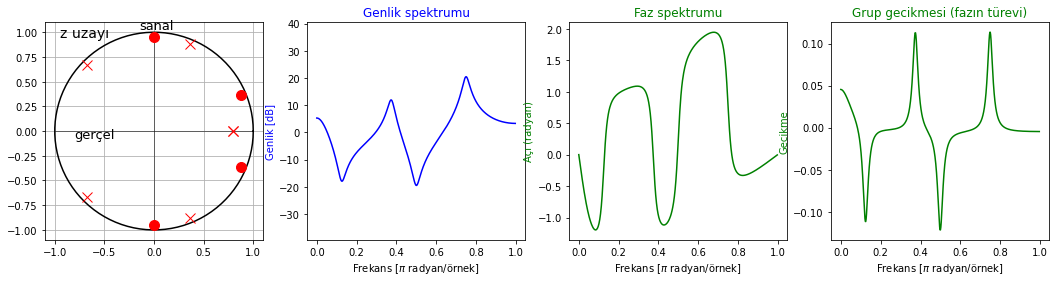

In [ ]:
kutup_acilari = np.array([0, np.pi*3/8, np.pi*3/4])
kutup_r = np.array([0.8, 0.95, 0.95])
kutuplar = kutup_r * np.exp(1j*kutup_acilari)
# Konjüge/eşlenik değerlerin eklenmesi
kutuplar = np.stack((kutuplar, np.conjugate(kutuplar))).ravel()

sifir_acilari = np.array([np.pi/8, np.pi/2])
sifir_r = np.array([0.95, 0.95])
sifirlar = sifir_r * np.exp(1j*sifir_acilari)
# Konjüge/eşlenik değerlerin eklenmesi
sifirlar = np.stack((sifirlar, np.conjugate(sifirlar))).ravel()

z_uzayi_ve_frekans_cevabi_cizim(kutuplar, sifirlar)

Şekil 3.8: Kutup ve sıfır çiftleri içeren bir sistem örneği

Kutupların olduğu $w$ değerlerinde tepeler, sıfırların olduğu $w$ değerlerinde çukurlar gözlüyoruz. 

**Örnek sistem-6)**

Örnek sistem 5'in tersi olan bir sistemi ele alalım: kutupları sıfır, sıfırları kutup yapmamız yeterli 

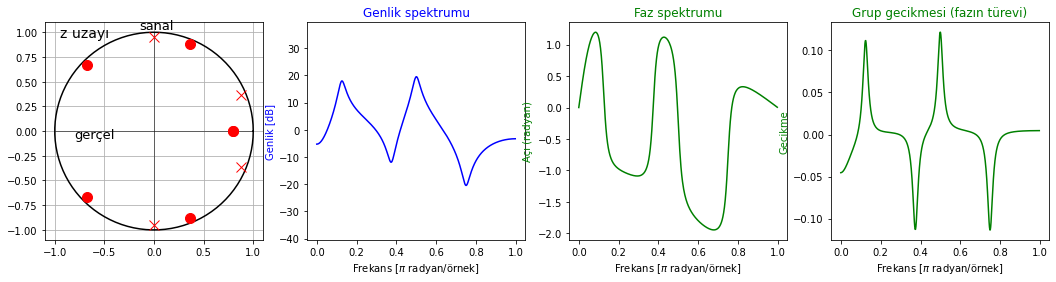

In [ ]:
ters_sistem_kutuplar = sifirlar
ters_sistem_sifirlar = kutuplar
z_uzayi_ve_frekans_cevabi_cizim(ters_sistem_kutuplar, ters_sistem_sifirlar)


Şekil 3.9: Kutup ve sıfır çiftleri içeren bir sistem örneği (Şekil 3.8'deki sistemin tersi olan sistem)

### Sistemin çıktısından yola çıkarak sistem modelleme


Birçok sinyal işleme uygulamasında sinyaller doğal bir süreçle bir sistemin çıktısı olarak oluşmuştur ve biz o sistemi modelleyebilmek isteriz. Örneğin konuşma sinyalleri insanlar tarafından ses tellerinden dudaklara kadar olan bir sistem tarafından üretilirler. Konuşma tanıma, konuşma sentezi, konuşma kodlama gibi birçok araştırma alanında bu kaydedilmiş sinyallerden yola çıkarak sistemin modellenmesine ihtiyaç duyulur. Bu kısımda, yukarıda bahsi geçen AR model kullanarak konuşma sinyalimizi (ve onu oluşturan sistemi) modellemeye dair bir örnek ele alacağız. AR sistemler için yukarıda sunduğumuz LCCDE'yi hatırlayalım:

$$
y[n] = x[n] - \sum_{k = 1}^{M} a[k]y[n-k]
$$

Konuşma sinyalinin çıktı (genelde kullanıldığı şekliyle $s[n]$ diyelim) olduğu alttaki modele (doğrusal) konuşma üretim modeli (İng: speech production model) adı verilir. Bu model çok yaygın olarak kullanıldığı için bu konuda oldukça fazla sayıda kaynak mevcut (örnek [bakınız](https://link.springer.com/content/pdf/bbm%3A978-1-4614-5143-3%2F1.pdf))

| <img src="https://ssp-iiith.vlabs.ac.in/exp/analysis-by-synthesis/images/lpmodel.png" width=400 height=200 /> |
| :-----------------------------------------------------------------------------------------------------------------------------------------------------------: |
|                                                   Şekil 3.10: _Konuşma sinyali üretim modeli_                                                   |


Tipik bir konuşma işleme uygulamasında elimizde kaydettiğimiz konuşma sesi (sistem çıktısı olan s[n]) vardır ve biz o sesi üreten sistemin özelliklerini, parametrelerini kestirmeye çalışırız. Bu işleme modelleme veya analiz ismi verilir. Analizi takiben, eğer model parametrelerini doğru bir şekilde kestirebilmişsek, eldeki modelle sentez gerçekleştirebilir hatta bunu parametrelerin değiştirilmiş haliyle (örneğin farklı temel titreşim frekansında) gerçekleştirebiliriz. 

Analiz adımı (sistemin parametrelerinin kestirimi) için doğrusal kestirim (İng: linear prediction) işleminin nümerik yöntemlerle gerçekleştirilmesi yaygın bir uygulamadır. Bu nümerik yöntemi de birçok kaynakta bulabilirsiniz (örneğin [bakınız](https://wiki.aalto.fi/display/ITSP/Linear+prediction)) Biz burada kolaya kaçıp hazır bir kütüphane fonksiyonu ([librosa.lpc](https://librosa.org/doc/main/generated/librosa.lpc.html)) yardımı ile konuşmayı üreten AR sistemin polinom katsayılarını kestireceğiz ve elde ettiğimiz sonucu anlamlandırmaya çalışacağız. Analizimizde kestirmeyi hedeflediğimiz sistemin (polinomunun) derecesini biz seçeceğiz. 

In [ ]:
%%capture --no-display
import librosa # doğrusal kestirim modelleme (linear predictive modeling) için kullanacağımız kütüphane
import soundfile as sf # Ses dosyalarını okumak için kullanacağımız kütüphane
import urllib.request # Dosya indirmek için kullanacağımız kütüphane
from IPython.display import Audio

Örnek ses dosyası indirip yükleyelim ve dinleyelim.

In [ ]:
url = 'https://github.com/barisbozkurt/dataDumpForCourses/raw/master/exampleSpeech.wav'
urllib.request.urlretrieve(url,'exampleSpeech.wav')
konusma_sinyali, fs = sf.read('exampleSpeech.wav')
print('Örnekleme frekansı: ', fs, 'Hz')
Audio(konusma_sinyali, rate=fs)

Örnekleme frekansı:  44100 Hz


Butonu tıklayarak yüklenen ses kaydını dinleyebilirsiniz

Şimdi sinyalin bir bölgesini analiz için kesip ayıralım.

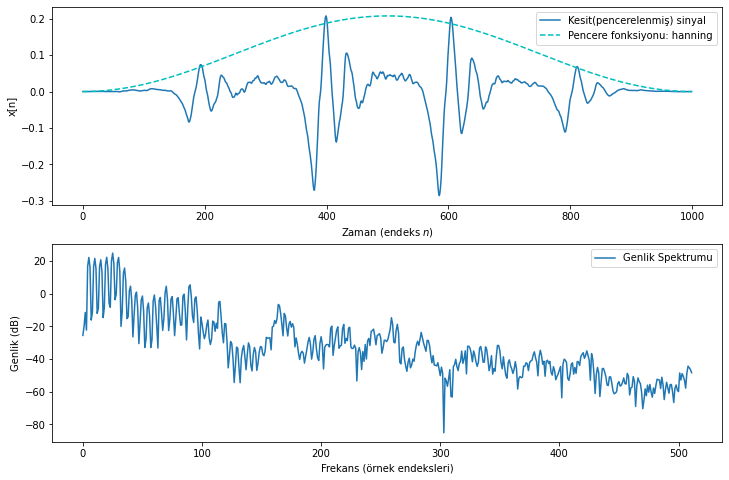

In [ ]:
a_bas_endeks = 26000
a_son_endeks = 27000
sinyal_kesit = konusma_sinyali[a_bas_endeks:a_son_endeks]
pencere_fonksiyonu = signal.get_window('hann', sinyal_kesit.size)
sinyal_kesit *= pencere_fonksiyonu
fft_n = pow(2, int(np.log2(sinyal_kesit.size) + 1))
genlik_spektrum = 20 * np.log10(np.abs(np.fft.fft(sinyal_kesit, n=fft_n)[:fft_n//2]))

# Sinyal ve genlik spektrumu çizimi
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(sinyal_kesit, label='Kesit(pencerelenmiş) sinyal')
plt.plot(pencere_fonksiyonu * np.max(sinyal_kesit), 'c--', label='Pencere fonksiyonu: hanning')
plt.xlabel('Zaman (endeks $n$)');plt.legend()
plt.ylabel('x[n]')
plt.subplot(2, 1, 2)
plt.plot(genlik_spektrum, label='Genlik Spektrumu');plt.legend()
plt.xlabel('Frekans (örnek endeksleri)')
plt.ylabel('Genlik (dB)');

Şekil 3.11: Pencerelenmiş kısa süreli bir konuşma sinyali örneği ve genlik spektrumu

Üstteki genlik spektrumunu incelediğinizde daha önce gördüğümüz (örnek sistem - 4) kutuplardan kaynaklı tepelere benzer tepeler gözleyebiliyoruz. Spektrumdaki detayların çoğunun ses tellerinde üretilen ve sisteme girdi olarak verilen sinyalden oluştuğunu varsayalım. Şimdi, sistemin AR olduğu varsayımı ile librosa.lpc fonksiyonu ile bu sistemin katsayılarını kestirelim.

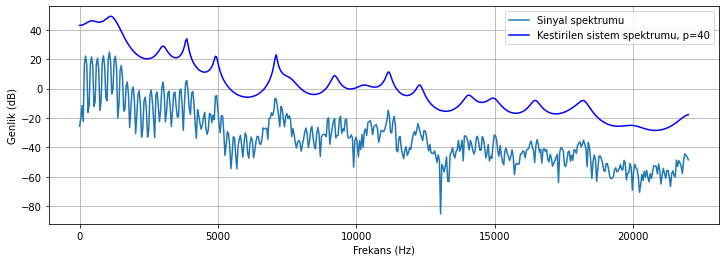

In [ ]:
# AR sistem (polimon) katsayılarının hazır fonksiyon(librosa.lpc) ile kestirimi
model_derecesi = 40
a = librosa.lpc(sinyal_kesit, model_derecesi) # KESTIRIM ADIMI: a polinomunun katsayıları kestiriliyor
b = [1] # y[n] sadece x[n]'nin o anki değerine bağlı, b polinomu 1 olarak alındı

# Sinyal spektrumu ile kestirilen sistemin frekans cevabının beraber çizdirilmesi
frekans_nokta_sayisi = fft_n//2 # fft ile hesaplanan spektrum ile freqz ile hesaplanacak spektrumu aynı nokta sayısında oluşturalım
# sistemin a ve b polinom katsayılarından spektrumu daha önce yaptığımız gibi hesaplayabiliriz
w, h = signal.freqz(b, a, frekans_nokta_sayisi)
filtre_40_spektrum = 20 * np.log10(np.abs(h))

plt.figure(figsize=(12, 4))
frekans_ekseni = w * fs / (2*np.pi)
plt.plot(frekans_ekseni, genlik_spektrum, label='Sinyal spektrumu');
plt.plot(frekans_ekseni, filtre_40_spektrum, 'b', label='Kestirilen sistem spektrumu, p=40');
plt.legend();
plt.xlabel("Frekans (Hz)");
plt.ylabel("Genlik (dB)");
plt.grid();

Şekil 3.12: Sinyalin genlik spektrumu ve sinyalden kestirilen AR sistem parametrelerinden yola çıkarak hesaplanan sistem frekans cevabı

Konuşma sinyalinden yola çıkarak, o sinyali oluşturduğu varsayılan AR (sadece kutupları olan) sistemin polinom katsayıları kestirildi ve sistemin frekans cevabı sinyal spektrumu ile beraber çizdirildi. Spektrumdaki uyuşma düzeyini inceleyiniz. 

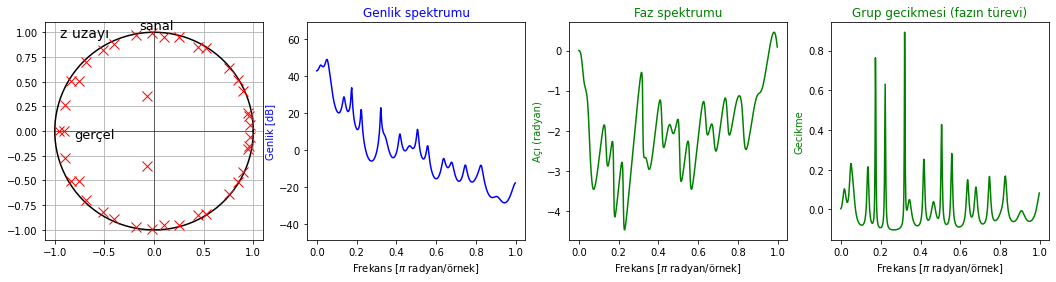

In [ ]:
# Kestirilen AR sistemin kutuplarını ve frekans cevabı önceki fonksiyonumuzla da çizdirebilirdik 
kutuplar = np.roots(a)
sifirlar = []
z_uzayi_ve_frekans_cevabi_cizim(kutuplar, sifirlar)

Şekil 3.13: Sinyalden kestirilen AR sisteminin kutuplarının $z$-uzayı gösterimi ve spektrum bileşenleri 

Daha önce kutupların açıları ile tepenin bulunduğu frekans arasında doğrudan bir ilişki olduğunu görmüştük. Konuşma sinyali bağlamında spektrumdaki tepelerin özel bir anlamı vardır: ağız kavitesinin rezonansları spektrumda tepeler oluşmasına yol açar ve bu rezonans frekanslarına [formant frekansları](https://en.wikipedia.org/wiki/Formant) adı verilir. Formantlar, fonetik bilimi gibi konuşma üzerine odaklanmış uzmanlık alanlarında kullanılan temel akustik parameterler arasında yer alır (temel kavramların özeti için [bakınız](http://research.spa.aalto.fi/publications/theses/lemmetty_mst/chap3.html)).  Kutupların açılarını spektrumda işaretleyip tepelerle ilişkisini inceleyelim.

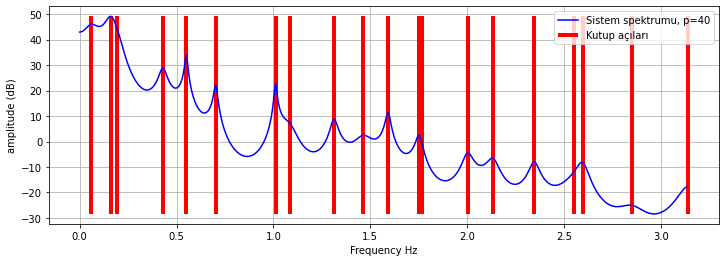

In [ ]:
# Kutup açılarının spektrumda gösterilmesi
# sadece pozitif açıları çizdireceğiz
kutup_acilari = np.angle(kutuplar)
kutup_acilari_pozitif = kutup_acilari[kutup_acilari > 0]

plt.figure(figsize=(12, 4))
plt.plot(w, filtre_40_spektrum, 'b', label='Sistem spektrumu, p=40');
plt.vlines(kutup_acilari_pozitif, np.min(filtre_40_spektrum), np.max(filtre_40_spektrum), 'r', linewidth=4, label='Kutup açıları')
plt.legend();
plt.xlabel("Frequency Hz");
plt.ylabel("amplitude (dB)");
plt.grid();

Şekil 3.14: Sinyalden kestirilen AR sistem genlik spektrumu ve kutup açıları

Kutup açılarının tepelerle örtüştüğünü görmüş olduk. Hatırlayalım: kutuplar birim çembere yaklaştıkça tepeler keskinleşecektir. Arzu ederseniz kutupları çembere yakınlıklarına göre sıraya dizip en keskinden en yayvan tepelere doğru sıralayabilirsiniz.

Modelin derecesi kaç kutup bulunacağını da belirleyecek: örneğin 2 dereceli bir polinomun 2 kutubu vardır. Yukarıda dereceyi 40 olarak seçmiştik. Bu 40 adet kutup bulunmasını sağlayacak. Polinomumuzun katsayıları gerçel olduğu için kutuplardan bazılarının tekil olarak gerçel eksende bazılarının (çoğunun) da kompleks eşlenik kutup çiftleri olarak hesaplanmasını bekleriz. Burada gördüğümüz dikey çizgiler kompleks eşlenik kutup çiftlerinin açılarına karşılık geliyor (sondaki çizgi gerçel ve negatif değere sahip bir tekil kutuptan kaynaklanıyor olabilir, kutupları yazdırıp kontrol edebilirsiniz).

#### Sistem modeli kullanılarak sinyal sentezleme

Konuşma sinyali üreten sistemi kestirebildiğimize (polinom katsayılarını hesapladığımıza) göre bu sistemle yeni konuşma sinyali de üretebiliriz. Bunun için bir fonksiyon yazıp elimizdeki ses sinyalinin farklı kesitleri üzerinde analiz-sentez denemeleri yapalım. Ses tellerinde oluşan ve sisteme girdi olarak verilen sinyalin dürtü katarı olduğunu varsaycağız ve bu dürtü katarının periyodunu ($T_0$) fonksiyonumuza girdi olarak vereceğiz.

In [ ]:
# N uzunluğunda T0 temel periyodunda konuşma sinyalini verilen sistem polinomlarını kullarak oluşturan fonksiyon
def ses_sentezle(b, a, N, T0):
  # Bir dürtü katarı oluşturup sistemden geçirelim 
  n = np.arange(N)
  durtu_katari = np.zeros((N, ))
  durtu_katari[n % T0 == 0] = 1 
  return signal.lfilter(b, a, durtu_katari)

# Analiz ve sentez adımlarını ardışık çağırarak ses sentezleyen fonksiyon
def analiz_sentez(konusma_sinyali, bas_endeks, son_endeks, pencere_turu, model_derecesi, hedef_T0, N):
  # Pencereleme
  sinyal_kesit = konusma_sinyali[bas_endeks:son_endeks]
  sinyal_kesit *= signal.get_window(pencere_turu, sinyal_kesit.size)
  # LP analiz
  a = librosa.lpc(sinyal_kesit, model_derecesi)
  b = [1]
  # Sentez
  return sinyal_kesit, ses_sentezle(b, a, N, hedef_T0)

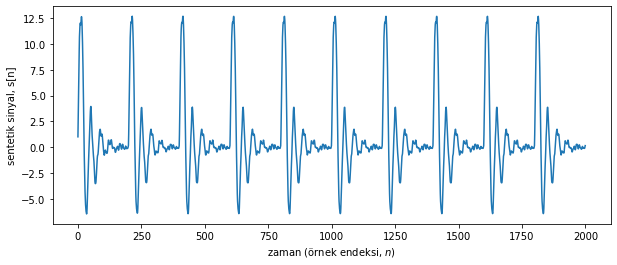

In [ ]:
T0 = 200 # örnek sayısı cinsinden periyod
model_derecesi = 40
pencere_turu = 'hann' # analiz sırasında kullanılacak pencereyi hanning olarak seçelim

# Kayıt içinde a sesinin geçitiği bölgenin endeksleri
a_bas_endeks = 26000
a_son_endeks = 27000
hedef_N = (a_son_endeks - a_bas_endeks) * 2; # analizde kullanılan kesitin iki katı uzunlukta sinyal sentezleyelim 

kayit_ses, sentez_ses = analiz_sentez(konusma_sinyali,a_bas_endeks,a_son_endeks, pencere_turu,model_derecesi, T0, hedef_N)

plt.figure(figsize=(10, 4));plt.plot(sentez_ses)
plt.xlabel('zaman (örnek endeksi, $n$)')
plt.ylabel('sentetik sinyal, s[n]')
Audio(sentez_ses, rate=fs)

Şekil 3.15: Sentetik ses sinyali

Üstte oluşturduğumuz sentetik sesi çizdirdik. Butonu tıklayıp sesi dinleyebilir ve bir altta orijinal kayıttan alınan kesitle karşılaştırabilirsiniz.

In [ ]:
# Kayıt orjinal kesit
Audio(sinyal_kesit, rate=fs)

Farklı periyotlarda da sentez yapabilirdik. Örneğin $T_0$'ı 200 örnek yerine 100 örnek seçelim. Periyodun azalması frekansın artması, sesin tizleşmesi sonucunu doğuracak. 

In [ ]:
T0 = 100
kayit_ses, sentez_ses = analiz_sentez(konusma_sinyali, a_bas_endeks, a_son_endeks, pencere_turu, model_derecesi, T0, hedef_N)
Audio(sentez_ses, rate=fs)

Örnek sayısı cinsinden periyod ile Hz cinsinden temel titreşim frekansı arasındaki ilişkiyi de yazalım:

$$T_{0_\text{süre(saniye)}} = T_{0_\text{örnek sayısı}} * \text{sure}_\text{örnek}$$

$$sure_\text{örnek} = \frac{1}{\text{frekans}_\text{örnekleme}}$$

$$T_{0_\text{süre(saniye)}} = \frac{T_{0_\text{örnek sayısı}}}{\text{frekans}_\text{örnekleme}}$$

$$f_{0_{Hz}} = \frac{1}{T_{0_\text{süre(saniye)}}} = \frac{\text{frekans}_\text{örnekleme}}{ T_{0_\text{örnek sayısı}}}$$

**Örnek:** 44100 Hz örnekleme frekansına ve 100 örnek uzunluğunda periyodu olan bir sinyalin frekansı 44100/100 = 441 Hz'dir.

In [ ]:
# 150 Hz temel titreşim frekanslı ses sentezi yapalım
T0 = int(fs/150)
kayit_ses, sentez_ses = analiz_sentez(konusma_sinyali, a_bas_endeks, a_son_endeks, pencere_turu, model_derecesi, T0, hedef_N)
Audio(sentez_ses, rate=fs)

Ses sentezini sisteme girdi olarak dürtü katarı yerine gürültü vererek yapabilirdik. Bu ses tellerinin titreşmeyip içinden hava geçtiği durumu (fısıltı bu şekilde oluşturulur)  simüle etmek için kullanılabilir. Deneyelim:

In [ ]:
# Gürültü ile sentez
N = 2000 # sentezlenecek örnek sayısı
gurultu = np.random.random((N,))
sentez_ses = signal.lfilter(b, a, gurultu)
Audio(sentez_ses, rate=fs)

Şimdi sinyalin için başka sesli harflere denk gelen bölgelerde benzer testler yapalım. 

In [ ]:
I_bas_endeks = 34500
I_son_endeks = 35500
T0 = int(fs/280)
kayit_ses, sentez_ses = analiz_sentez(konusma_sinyali, I_bas_endeks, I_son_endeks, pencere_turu, model_derecesi, T0, hedef_N)
Audio(sentez_ses, rate=fs)

In [ ]:
Audio(kayit_ses, rate=fs)

In [ ]:
i_bas_endeks = 43120
i_son_endeks = 44700
T0 = int(fs/280)
kayit_ses, sentez_ses = analiz_sentez(konusma_sinyali, i_bas_endeks, i_son_endeks, pencere_turu, model_derecesi, T0, hedef_N)
Audio(sentez_ses, rate=fs)

In [ ]:
Audio(kayit_ses, rate=fs)

In [ ]:
e_bas_endeks = 69400
e_son_endeks = 71400
T0 = int(fs/200)
kayit_ses, sentez_ses = analiz_sentez(konusma_sinyali, e_bas_endeks, e_son_endeks, pencere_turu, model_derecesi, T0, hedef_N)
Audio(sentez_ses, rate=fs)

In [ ]:
Audio(kayit_ses, rate=fs)

Bu defterimizde sistemlerin $z$ uzayında polinomlar şeklinde temsilini, polinom kökleri ile sistemin frekans cevabı arasındaki ilişkileri ele aldık. Bir sonraki defterimizde sinyallerin spektrumuna odaklanacağız. 

**Yazar:** Barış Bozkurt, **editör:** Ahmet Uysal

---